# Titanic Dataset

### In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive the most infamous shipwrecks in history. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy, i.e to predict if a passenger survived the sinking of the Titanic or not.

In [1]:
import numpy as np
import os
import pandas as pd

np.random.seed(42)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "titanic_classification"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [2]:
TITANIC_PATH = os.path.join("datasets","")

def load_titanic_data(file, titanic_path= TITANIC_PATH):
    csv_path = os.path.join(titanic_path, file)
    return pd.read_csv(csv_path)

In [3]:
titanic_train = load_titanic_data("titanic_train.csv")
titanic_test = load_titanic_data('titanic_test.csv')
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Saving figure attribute_histogram_plots


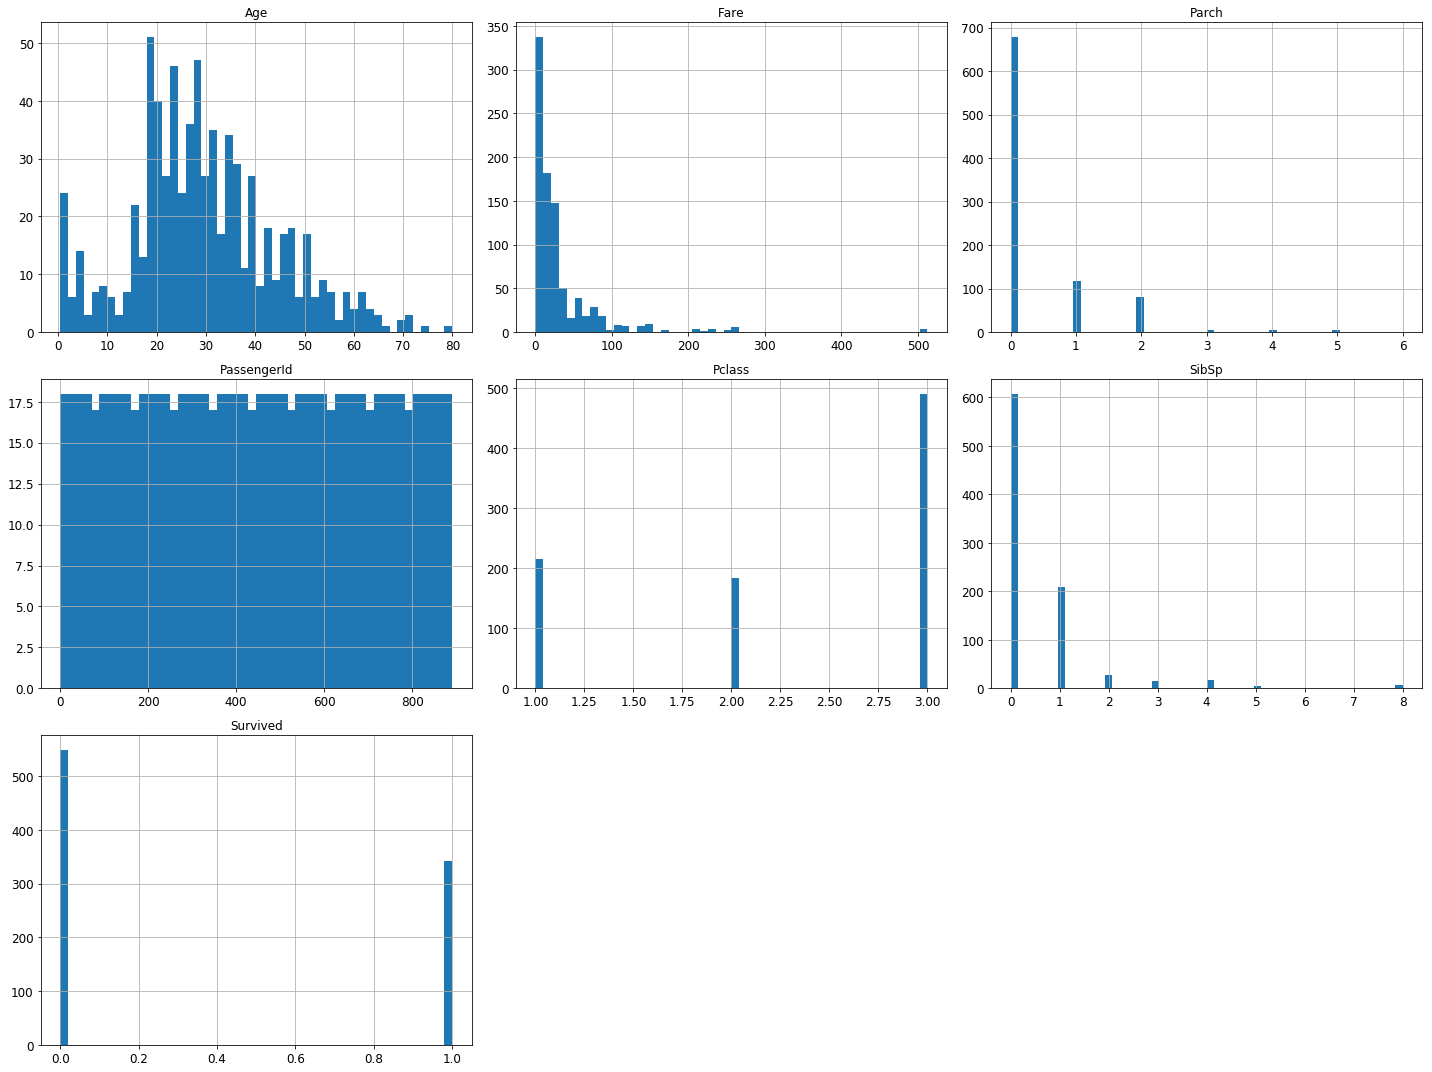

In [4]:
import matplotlib.pyplot as plt
titanic_train.hist(bins= 50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [5]:
train_set = titanic_train
test_set = titanic_test

In [6]:
train_set.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
from sklearn.base import BaseEstimator, TransformerMixin

# A class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [9]:
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                        index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

In [10]:
from future_encoders import OneHotEncoder

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy="median")

num_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector(["Age", "SibSp", "Parch", "Fare"])),
        ("imputer", Imputer(strategy="median")),
    ])

In [12]:
cat_pipeline = Pipeline([
        ("select_cat", DataFrameSelector(["Pclass", "Sex", "Embarked"])),
        ("imputer", MostFrequentImputer()),
        ("one_hot_cat_encoder", OneHotEncoder(sparse=False)),
    ])

In [13]:
num_pipeline.fit_transform(train_set)

array([[22.    ,  1.    ,  0.    ,  7.25  ],
       [38.    ,  1.    ,  0.    , 71.2833],
       [26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [28.    ,  1.    ,  2.    , 23.45  ],
       [26.    ,  0.    ,  0.    , 30.    ],
       [32.    ,  0.    ,  0.    ,  7.75  ]])

In [14]:
cat_pipeline.fit_transform(train_set)

array([[0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [15]:
from sklearn.pipeline import FeatureUnion
preprocess_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [16]:
X_train = preprocess_pipeline.fit_transform(train_set)
X_train[:5]

array([[22.    ,  1.    ,  0.    ,  7.25  ,  0.    ,  0.    ,  1.    ,
         0.    ,  1.    ,  0.    ,  0.    ,  1.    ],
       [38.    ,  1.    ,  0.    , 71.2833,  1.    ,  0.    ,  0.    ,
         1.    ,  0.    ,  1.    ,  0.    ,  0.    ],
       [26.    ,  0.    ,  0.    ,  7.925 ,  0.    ,  0.    ,  1.    ,
         1.    ,  0.    ,  0.    ,  0.    ,  1.    ],
       [35.    ,  1.    ,  0.    , 53.1   ,  1.    ,  0.    ,  0.    ,
         1.    ,  0.    ,  0.    ,  0.    ,  1.    ],
       [35.    ,  0.    ,  0.    ,  8.05  ,  0.    ,  0.    ,  1.    ,
         0.    ,  1.    ,  0.    ,  0.    ,  1.    ]])

In [17]:
y_train = train_set["Survived"]

In [18]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_score = cross_val_score(svm_clf, X_train, y_train, cv=10)
svm_score.mean()

0.7365250822835092

In [19]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train, y_train)
forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)
forest_scores.mean()

0.8115690614005221

In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
knn_scores = cross_val_score(knn_clf, X_train, y_train, cv=10)
knn_scores.mean()

0.7184720803541028

In [21]:
X_test = preprocess_pipeline.fit_transform(test_set)

In [22]:
y_pred = forest_clf.predict(X_test)

In [23]:
test_set[["PassengerId","Age"]][:10]

,PassengerId,Age
0,892,34.5
1,893,47.0
2,894,62.0
3,895,27.0
4,896,22.0
5,897,14.0
6,898,30.0
7,899,26.0
8,900,18.0
9,901,21.0


In [24]:
X_test[:10]

array([[34.5   ,  0.    ,  0.    ,  7.8292,  0.    ,  0.    ,  1.    ,
         0.    ,  1.    ,  0.    ,  1.    ,  0.    ],
       [47.    ,  1.    ,  0.    ,  7.    ,  0.    ,  0.    ,  1.    ,
         1.    ,  0.    ,  0.    ,  0.    ,  1.    ],
       [62.    ,  0.    ,  0.    ,  9.6875,  0.    ,  1.    ,  0.    ,
         0.    ,  1.    ,  0.    ,  1.    ,  0.    ],
       [27.    ,  0.    ,  0.    ,  8.6625,  0.    ,  0.    ,  1.    ,
         0.    ,  1.    ,  0.    ,  0.    ,  1.    ],
       [22.    ,  1.    ,  1.    , 12.2875,  0.    ,  0.    ,  1.    ,
         1.    ,  0.    ,  0.    ,  0.    ,  1.    ],
       [14.    ,  0.    ,  0.    ,  9.225 ,  0.    ,  0.    ,  1.    ,
         0.    ,  1.    ,  0.    ,  0.    ,  1.    ],
       [30.    ,  0.    ,  0.    ,  7.6292,  0.    ,  0.    ,  1.    ,
         1.    ,  0.    ,  0.    ,  1.    ,  0.    ],
       [26.    ,  1.    ,  1.    , 29.    ,  0.    ,  1.    ,  0.    ,
         0.    ,  1.    ,  0.    ,  0.    ,  1.    ],


In [25]:
predictions = {'PassengerId' : test_set["PassengerId"],
              'Survived': y_pred}

In [26]:
final_df = pd.DataFrame(predictions, columns = ['PassengerId', 'Survived'])

In [27]:
final_df.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


In [28]:
final_df.to_csv('titanic_submission.csv',index=False)